# Resume Cleaning using NLP Techniques

# Problem Statement:
Write a program for the Information Retrieval System using appropriate NLP tools (such as NLTK, Open NLP, …) and perform following operations- 

 

a. Text tokenization  

b. Count word frequency  

c. Remove stop words  

d. POS tagging

### Neccessary Imports

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/anonymous/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anonymous/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Importing the dataset

In [4]:
df = pd.read_csv('Resume_Data.csv', encoding = 'utf-8')
df['Cleaned_Resume'] = ''

### Exploratory Data Analysis

In [5]:
df.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


In [6]:
print("Resume Categories")
print(df['Category'].value_counts())

Resume Categories
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


#### Visualizing types of people who have given the resume

<AxesSubplot:xlabel='count', ylabel='Category'>

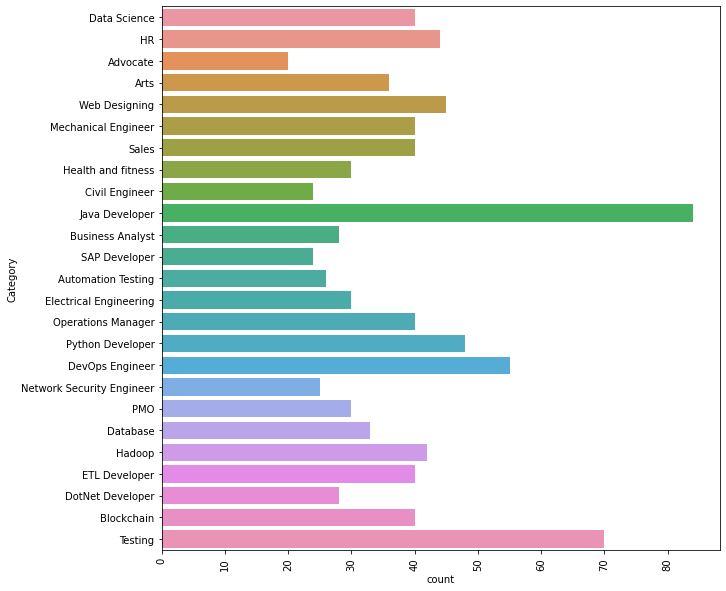

In [7]:
plt.figure(figsize = (10, 10))                                          # Setting size of plot
plt.xticks(rotation = 90)                                               # Rotating plot to organize horizontally
sns.countplot(y = 'Category', data = df)                                # Deciding which column of Dataframe will the source for plot

### Data Cleaning

In [8]:
def Clean_Resume(resumeText):
    Removals = [                                                        # Deciding weeds in resume
        'http\S+\s*',                                                   # Web URLs
        'RT|cc',                                                        # Regular characters
        '#\S+',                                                         # Hashtags
        '@\S+',                                                         # Emails
        '\s+'
    ]
    
    for weed in Removals: resumeText = re.sub(weed, ' ', resumeText)    # Removing weeds using regular expression
    resumeText = re.sub('[%s]'%re.escape("""!"#$%&'_=-+()[];:,./?^*@{}|\~"""), ' ', resumeText)
    resumeText = re.sub(r'[^x00-x7f]', r' ', resumeText)
    
    return resumeText

In [9]:
df['Cleaned_Resume'] = df.Resume.apply(lambda x: Clean_Resume(x))
df.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages P thon pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details Ma 2013 to Ma 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control S ste...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R P thon SAP HANA Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Har ...


In [10]:
corpus = ''
for i in range(len(df)): corpus += df['Cleaned_Resume'][i]
corpus[450:1000]

'ticSearch D3 js  DC js  Plotl   kibana  matplotlib  ggplot  Tableau    Others  Regular Expression  HTML  CSS  Angular 6  Logstash  Kafka  P thon Flask  Git  Docker  computer vision   Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate   Ernst   Young LLP Skill Details JAVASCRIPT  Exprience   24 months jQuer   Exprience   24 months P thon  Exprience   24 monthsCompan  Details compan    Ernst   Young LLP description   Fraud Investigations and Dispute Services Assurance TEC'

### Creating the Tokenizer and Tokenizing

In [11]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(corpus)                                     # Tokenizing the text into individual words

words = [word.lower() for word in tokens]                               # Transforming all words to lowercase
print(len(words))

423116


### Fetching English Stop Words

In [12]:
stopwords = nltk.corpus.stopwords.words('english')

### Removing Stop words

In [13]:
words_new = [
    word
    for word in words
    if word not in stopwords
]

In [14]:
len(words_new)

326374

### Lemmatization

In [15]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

lem_words = [
    wnl.lemmatize(word)
    for word in words_new
]

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - '/home/anonymous/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
same=0
diff=0
for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

In [ ]:
freq_dist = nltk.FreqDist(lem_words)
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [ ]:
mostcommon = freq_dist.most_common(50)
mostcommon

In [ ]:
res=' '.join([i for i in lem_words if not i.isdigit()])

In [ ]:
import os
os.system('pip install wordcloud')

In [ ]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (100 Words)')
plt.axis('off')
plt.show()

In [ ]:
df